Kevin R. Salger
11/22/2021
IS670 Homework 7

Please download default_credit.csv from BeachBoard, try to build:
a.	A decision tree classifier – HW4
b.	A random forest classifier – HW6
c.	A neuron network classifier – HW7, Pg 293

Requirements for Question 2:
*	Use 30% of the data as testing data
*	Display the accuracy score of both training and testing data
*	Please try to achieve at least >80% for the Neural Network


In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import tree # Needed for plotting decision tree with tree.plot_tree()
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [2]:
# Loading the data from default_credit.csv file
credit_df = pd.read_csv('d:\documents\education\CSULB\MSIS\IS670 Bus Intel\HW 7 112221\default_credit.csv')

# Adding the scaling code before any of the classifiers
X_df = credit_df.drop(columns=['Y'])
scaleInput = MinMaxScaler()
X = scaleInput.fit_transform(X_df)
#X = credit_df.drop(columns=['Y'])
y = credit_df['Y']

#X.rename(columns = {'C[':'CSquare'}, inplace = True) 
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

# Verifying the reading of default_credit.csv by printing it out
credit_df


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Decision Tree

'\n#_ = tree.plot_tree(classTree, max_depth=4, feature_names=credit_df.columns[:21])\n#_ = tree.plot_tree(classTree, max_depth=None, feature_names=credit_df.columns[:6], class_names=classTree.classes_)\n\n#smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)\n#smallClassTree.fit(train_X, train_y)\n\n#plotDecisionTree(smallClassTree, feature_names=train_X.columns)\n'

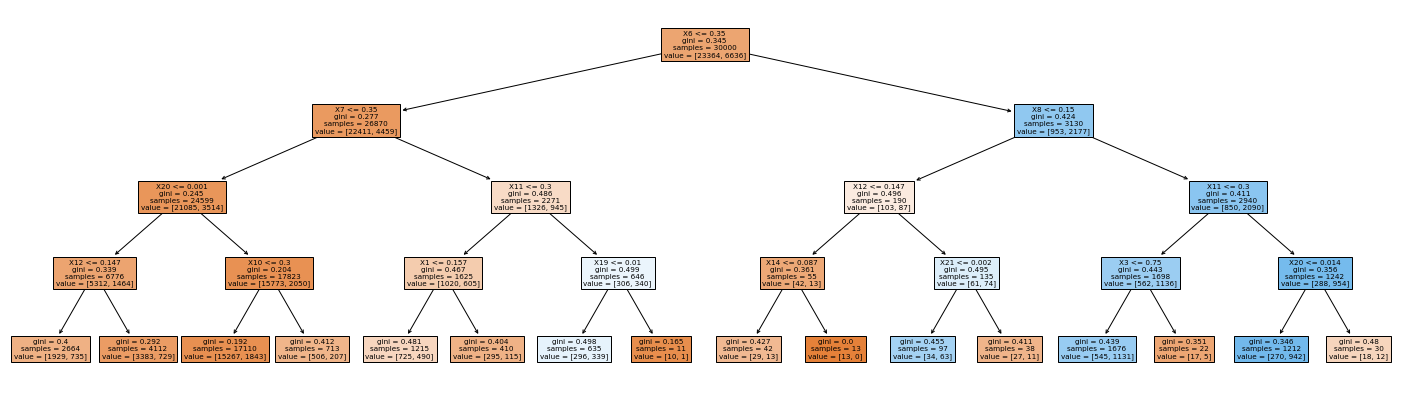

In [3]:
# Remember, plotDecisionTree does not work in VSCode

classTree = DecisionTreeClassifier(random_state=0, max_depth=4)
classTree.fit(X, y)

#print("Classes: {}".format(', '.join(classTree.classes_)))
fig = plt.figure(figsize=(25,7))#, constrained_layout=True) # Contrained_layout limited the image size
_ = tree.plot_tree(classTree, max_depth=30, feature_names=credit_df.columns[:21], filled=True)
# Unfortunately, I do not see any way to adjust sample split or impurity with plot_tree
"""
#_ = tree.plot_tree(classTree, max_depth=4, feature_names=credit_df.columns[:21])
#_ = tree.plot_tree(classTree, max_depth=None, feature_names=credit_df.columns[:6], class_names=classTree.classes_)

#smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
#smallClassTree.fit(train_X, train_y)

#plotDecisionTree(smallClassTree, feature_names=train_X.columns)
"""

In [4]:
classificationSummary(train_y, classTree.predict(train_X))
classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8243)

       Prediction
Actual     0     1
     0 15555   809
     1  2880  1756
Confusion Matrix (Accuracy 0.8203)

       Prediction
Actual    0    1
     0 6664  336
     1 1281  719


## Random Forest

In [5]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6)
rf.fit(train_X, train_y)
classificationSummary(train_y, rf.predict(train_X))
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8264)

       Prediction
Actual     0     1
     0 15737   627
     1  3019  1617
Confusion Matrix (Accuracy 0.8160)

       Prediction
Actual    0    1
     0 6707  293
     1 1363  637


## Neural Network

In [6]:
# Use the Multi-Layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes=(4), activation='logistic', solver='lbfgs', random_state=1, max_iter=1000)
clf.fit(train_X, train_y)

classificationSummary(train_y, clf.predict(train_X))
classificationSummary(valid_y, clf.predict(valid_X))


Confusion Matrix (Accuracy 0.8220)

       Prediction
Actual     0     1
     0 15576   788
     1  2950  1686
Confusion Matrix (Accuracy 0.8186)

       Prediction
Actual    0    1
     0 6679  321
     1 1312  688


In [7]:
#from sklearn.preprocessing import MinMaxScaler # Included with the rest of the import statements above
# This code is from page 293 in the textbook.  It may not be required for the homework.

classes=sorted(y.unique())

cred = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)

cred.fit(X, y)
cred.predict(X)

print("Intercepts")
print(cred.intercepts_)

print("Weights")
print(cred.coefs_)


Intercepts
[array([ 8.10665728, -1.12762043,  6.17253501]), array([-0.20729089])]
Weights
[array([[ 6.83684449e-01, -5.40090992e+00,  1.01310914e+00],
       [ 8.87277696e-02, -1.69504702e-01, -1.05749001e-02],
       [-1.88522086e-01, -6.65197512e-01, -2.10726632e-01],
       [-4.00119525e-01, -9.97869971e-01,  1.88270880e-01],
       [-1.08476513e+00, -5.01098847e-01,  6.33213904e-01],
       [-2.54124087e+01, -4.01441878e+00, -2.97089849e+00],
       [-1.41795321e+00, -1.51606651e+00,  2.24285845e+00],
       [ 1.88606501e+00,  3.80697340e+00, -7.40338295e-01],
       [ 8.10879032e-01,  1.19717577e+00,  8.11514083e-01],
       [ 1.32603838e+00,  2.81471595e+00, -7.34204127e-01],
       [ 1.27274148e-02,  2.31797094e+00, -1.26332400e+00],
       [-4.67639624e+00, -5.51100280e-01, -1.60566523e+01],
       [-4.00481072e+00,  3.55214319e+00, -1.43365001e+01],
       [-1.00805209e+00,  9.43390777e-01, -8.54798748e+00],
       [-9.73815932e-01,  2.34046785e-01, -1.18078920e+01],
       [ 

In [8]:
# Used only to determine what is concatenated to df in the next code cell.
pd.DataFrame(cred.predict_proba(X), columns=classes)

,0,1
0,0.315863,0.684137
1,0.710511,0.289489
2,0.881396,0.118604
3,0.847791,0.152209
4,0.846028,0.153972
...,...,...
29995,0.860564,0.139436
29996,0.858330,0.141670
29997,0.383730,0.616270
29998,0.835883,0.164117


In [9]:
# This code is also from page 293 in the textbook.
print(pd.concat([credit_df, pd.DataFrame(cred.predict_proba(X), columns=classes)], axis=1))

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X17    X18    X19  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...      0      0    689   
1      120000   2   2   2  26  -1   2   0   0    0  ...   3261      0   1000   
2       90000   2   2   2  34   0   0   0   0    0  ...  15549   1518   1500   
3       50000   2   2   1  37   0   0   0   0    0  ...  29547   2000   2019   
4       50000   1   2   1  57  -1   0  -1   0    0  ...  19131   2000  36681   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  15980   8500  20000   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...      0   1837   3526   
29997   30000   1   2   2  37   4   3   2  -1    0  ...  19357      0      0   
29998   80000   1   3   1  41   1  -1   0   0    0  ...  48944  85900   3409   
29999   50000   1   2   1  46   0   0   0   0    0  ...  15313   2078   1800   

         X20   X21    X22   X23  Y     

In [10]:
classificationSummary(train_y, cred.predict(train_X))
classificationSummary(valid_y, cred.predict(valid_X))

Confusion Matrix (Accuracy 0.8197)

       Prediction
Actual     0     1
     0 15560   804
     1  2983  1653
Confusion Matrix (Accuracy 0.8178)

       Prediction
Actual    0    1
     0 6675  325
     1 1315  685


## AdaBoost

In [11]:

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         n_estimators=100)

bdt.fit(train_X, train_y)
classificationSummary(train_y, bdt.predict(train_X))
classificationSummary(valid_y, bdt.predict(valid_X))



Confusion Matrix (Accuracy 0.8198)

       Prediction
Actual     0     1
     0 15659   705
     1  3080  1556
Confusion Matrix (Accuracy 0.8150)

       Prediction
Actual    0    1
     0 6704  296
     1 1369  631


## XGBoost

In [12]:
#pip install xgboost

# XGBoost is not from sklearn, so the features nameing convention is differenct. 
# in our dataset we have a feature name is "C[". XGBoost do not aloow that. 
# We need to rename the feature.


from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_X, train_y)
classificationSummary(train_y, model.predict(train_X))
classificationSummary(valid_y, model.predict(valid_X))


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix (Accuracy 0.8878)

       Prediction
Actual     0     1
     0 16036   328
     1  2029  2607
Confusion Matrix (Accuracy 0.8133)

       Prediction
Actual    0    1
     0 6613  387
     1 1293  707


In [13]:
# the above code seems overfitting. let's control it. 
#by increase the value of gamma
# you may further expriment decreast the learning rate etc. OR just do a grid search.

model = XGBClassifier(gamma=0.3)
model.fit(train_X, train_y)
classificationSummary(train_y, model.predict(train_X))
classificationSummary(valid_y, model.predict(valid_X))


[17:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Confusion Matrix (Accuracy 0.8910)

       Prediction
Actual     0     1
     0 16041   323
     1  1967  2669
Confusion Matrix (Accuracy 0.8133)

       Prediction
Actual    0    1
     0 6611  389
     1 1291  709


## Gradient Boost

In [14]:

boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(train_y, boost.predict(train_X))
classificationSummary(valid_y, boost.predict(valid_X))


Confusion Matrix (Accuracy 0.8279)

       Prediction
Actual     0     1
     0 15604   760
     1  2854  1782
Confusion Matrix (Accuracy 0.8188)

       Prediction
Actual    0    1
     0 6660  340
     1 1291  709


## knn

In [15]:
# This K-nearest neighbor code runs well, but requires more import statements
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params ={'n_neighbors':[3,5,7,9],
              'weights':['uniform','distance']}


In [16]:
#################################################################
##  THIS CODE TAKES TIME & PROCESSING POWER TO RUN!!           ##
##  THIS CODE TEMPORARILY HALTED MUSIC STREAMING AND LOCKED UP ##
##  MY KEYBOARD & MOUSE WHILE PROCESSING!!  KRS, 12/12/2021    ##
#################################################################
gs = GridSearchCV(KNeighborsClassifier(weights='uniform'),grid_params,cv=5,n_jobs=-1,scoring='accuracy')
gs.fit(train_X,train_y)
print(gs.best_params_)
bestKnn= gs.best_estimator_


{'n_neighbors': 9, 'weights': 'uniform'}


In [17]:
classificationSummary(train_y, bestKnn.predict(train_X))
classificationSummary(valid_y, bestKnn.predict(valid_X))

Confusion Matrix (Accuracy 0.8302)

       Prediction
Actual     0     1
     0 15601   763
     1  2803  1833
Confusion Matrix (Accuracy 0.8092)

       Prediction
Actual    0    1
     0 6588  412
     1 1305  695


## It seems overfitting is a big issue here. 